# Disclaimer

This notebook was obtained from  Kaggle and it has been retrofitted to be part of the Thinking Machines MLE exam. All credits of the notebook go to [WONG WAN WEN's original notebook](https://www.kaggle.com/code/wongwanwen/predicting-bank-customer-churn-capstone-project).

# Problem Statement
As it is more costly to attract new customers than to retain existing ones, the bank wants to predict whether a customer will churn based on their demographics and characteristics, so that it can come up with recommendations to retain the customers

# EDA with Visualisation

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline # didn't use this

In [3]:
df = pd.read_csv('../data/churn.csv')

In [4]:
df.head()
df.info() # no missing values
df.describe()

,RowNumber,CustomerId,Surname,CreditScore,Branch,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,Manila,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Makati City,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,Manila,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,Manila,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Makati City,Female,43,2,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Branch           10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Common Steps in Cleaning Data:
1. Handling Missing Data 
3. Encoding strings to numbers (because machine learning models deal with numbers only)
4. Standardization
5. Drop Outliers or duplicates (full/partial row)

### Removing unwanted columns

In [5]:
df = df.drop(df.columns[0:3], axis=1)
df.head()
df.shape

,CreditScore,Branch,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Manila,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Makati City,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Manila,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Manila,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Makati City,Female,43,2,125510.82,1,1,1,79084.10,0


(10000, 11)

### Renaming column(s)

In [6]:
#rename columns
mapping = {'HasCrCard':'HasCreditCard'
          }
df=df.rename(columns=mapping)
df.head()

,CreditScore,Branch,Gender,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Exited
0,619,Manila,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Makati City,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Manila,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Manila,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Makati City,Female,43,2,125510.82,1,1,1,79084.10,0


### Handling duplicates (if any)

In [7]:
df.duplicated().sum() # no duplicates

0

### Handling for missing data (if any)

In [8]:
df.isnull().sum() # no missing data

CreditScore        0
Branch             0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCreditCard      0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Checking for outliers

array([[<AxesSubplot: title={'center': 'CreditScore'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Tenure'}>],
       [<AxesSubplot: title={'center': 'Balance'}>,
        <AxesSubplot: title={'center': 'NumOfProducts'}>,
        <AxesSubplot: title={'center': 'HasCreditCard'}>],
       [<AxesSubplot: title={'center': 'IsActiveMember'}>,
        <AxesSubplot: title={'center': 'EstimatedSalary'}>,
        <AxesSubplot: title={'center': 'Exited'}>]], dtype=object)

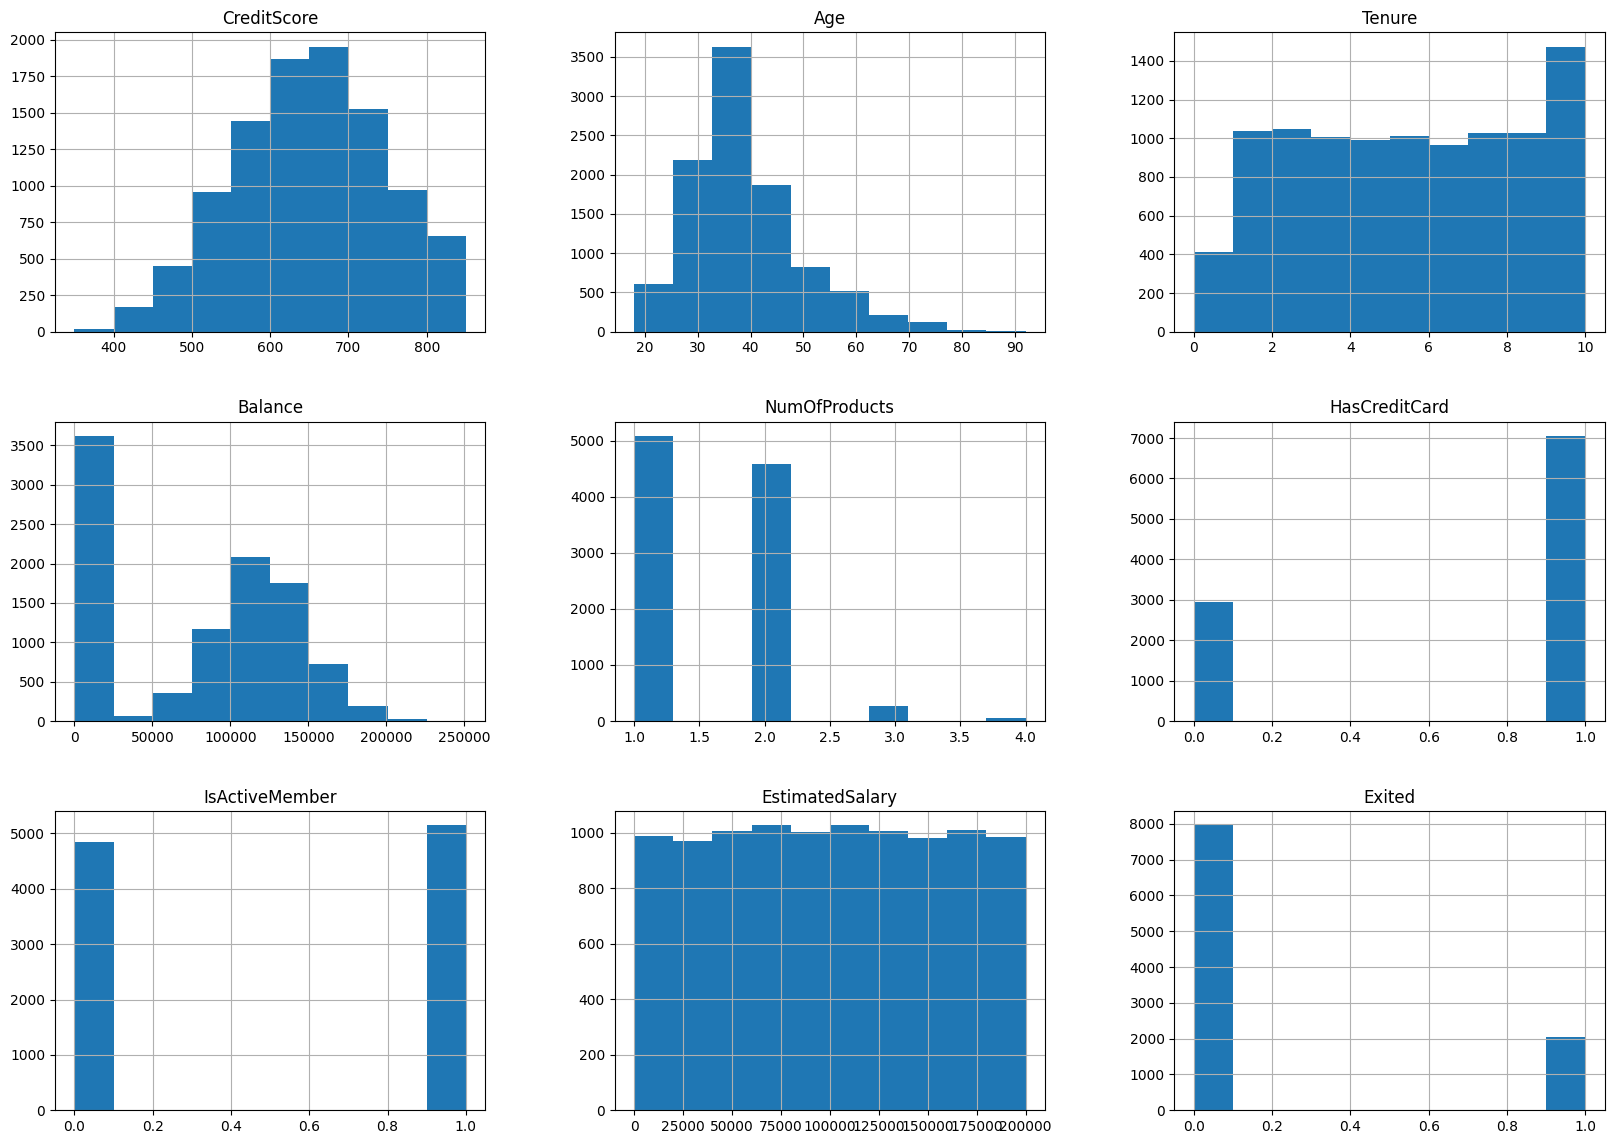

In [9]:
df.hist(figsize=(20,14)) # no outliers

/tmp/ipykernel_15167/3949349635.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='YlGnBu', linewidths = 2, vmin=-1, vmax=1, fmt='.2f', annot=True)


<AxesSubplot: >

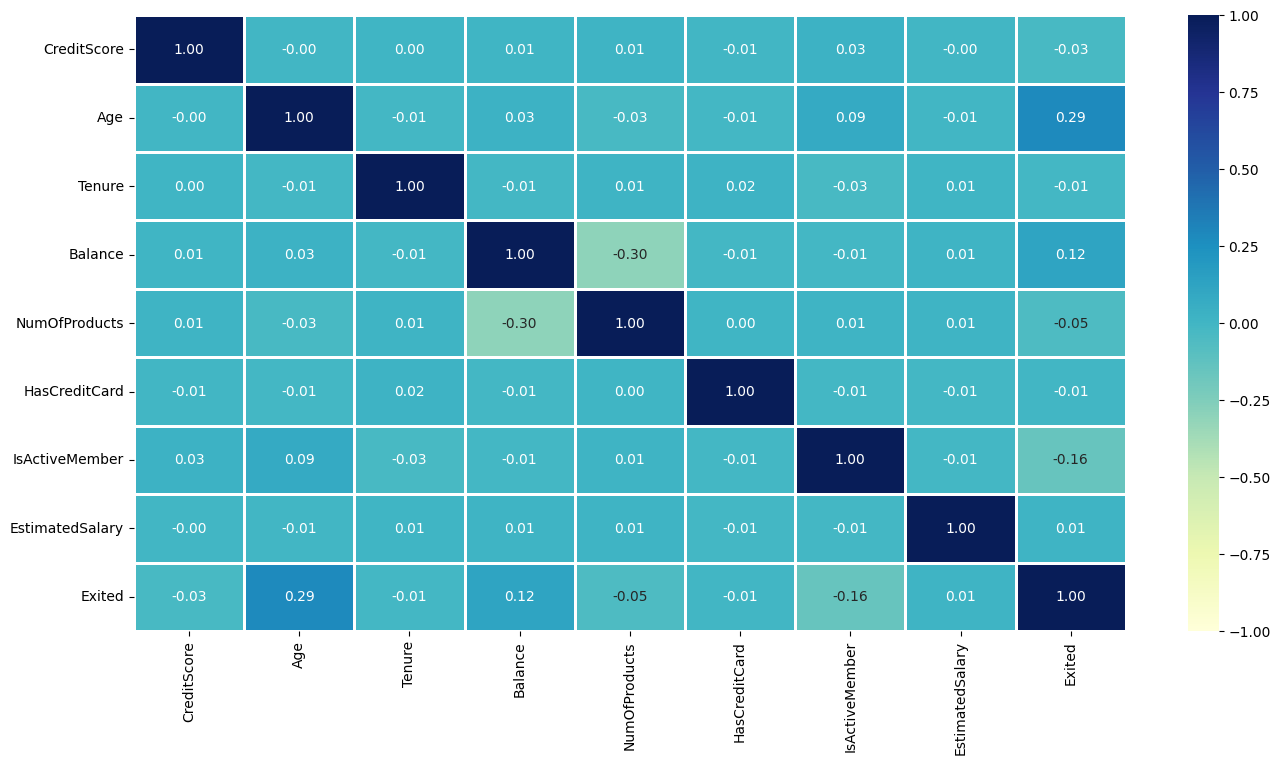

In [10]:
plt.rcParams['figure.figsize'] = (16,8)
sns.heatmap(df.corr(), cmap='YlGnBu', linewidths = 2, vmin=-1, vmax=1, fmt='.2f', annot=True)

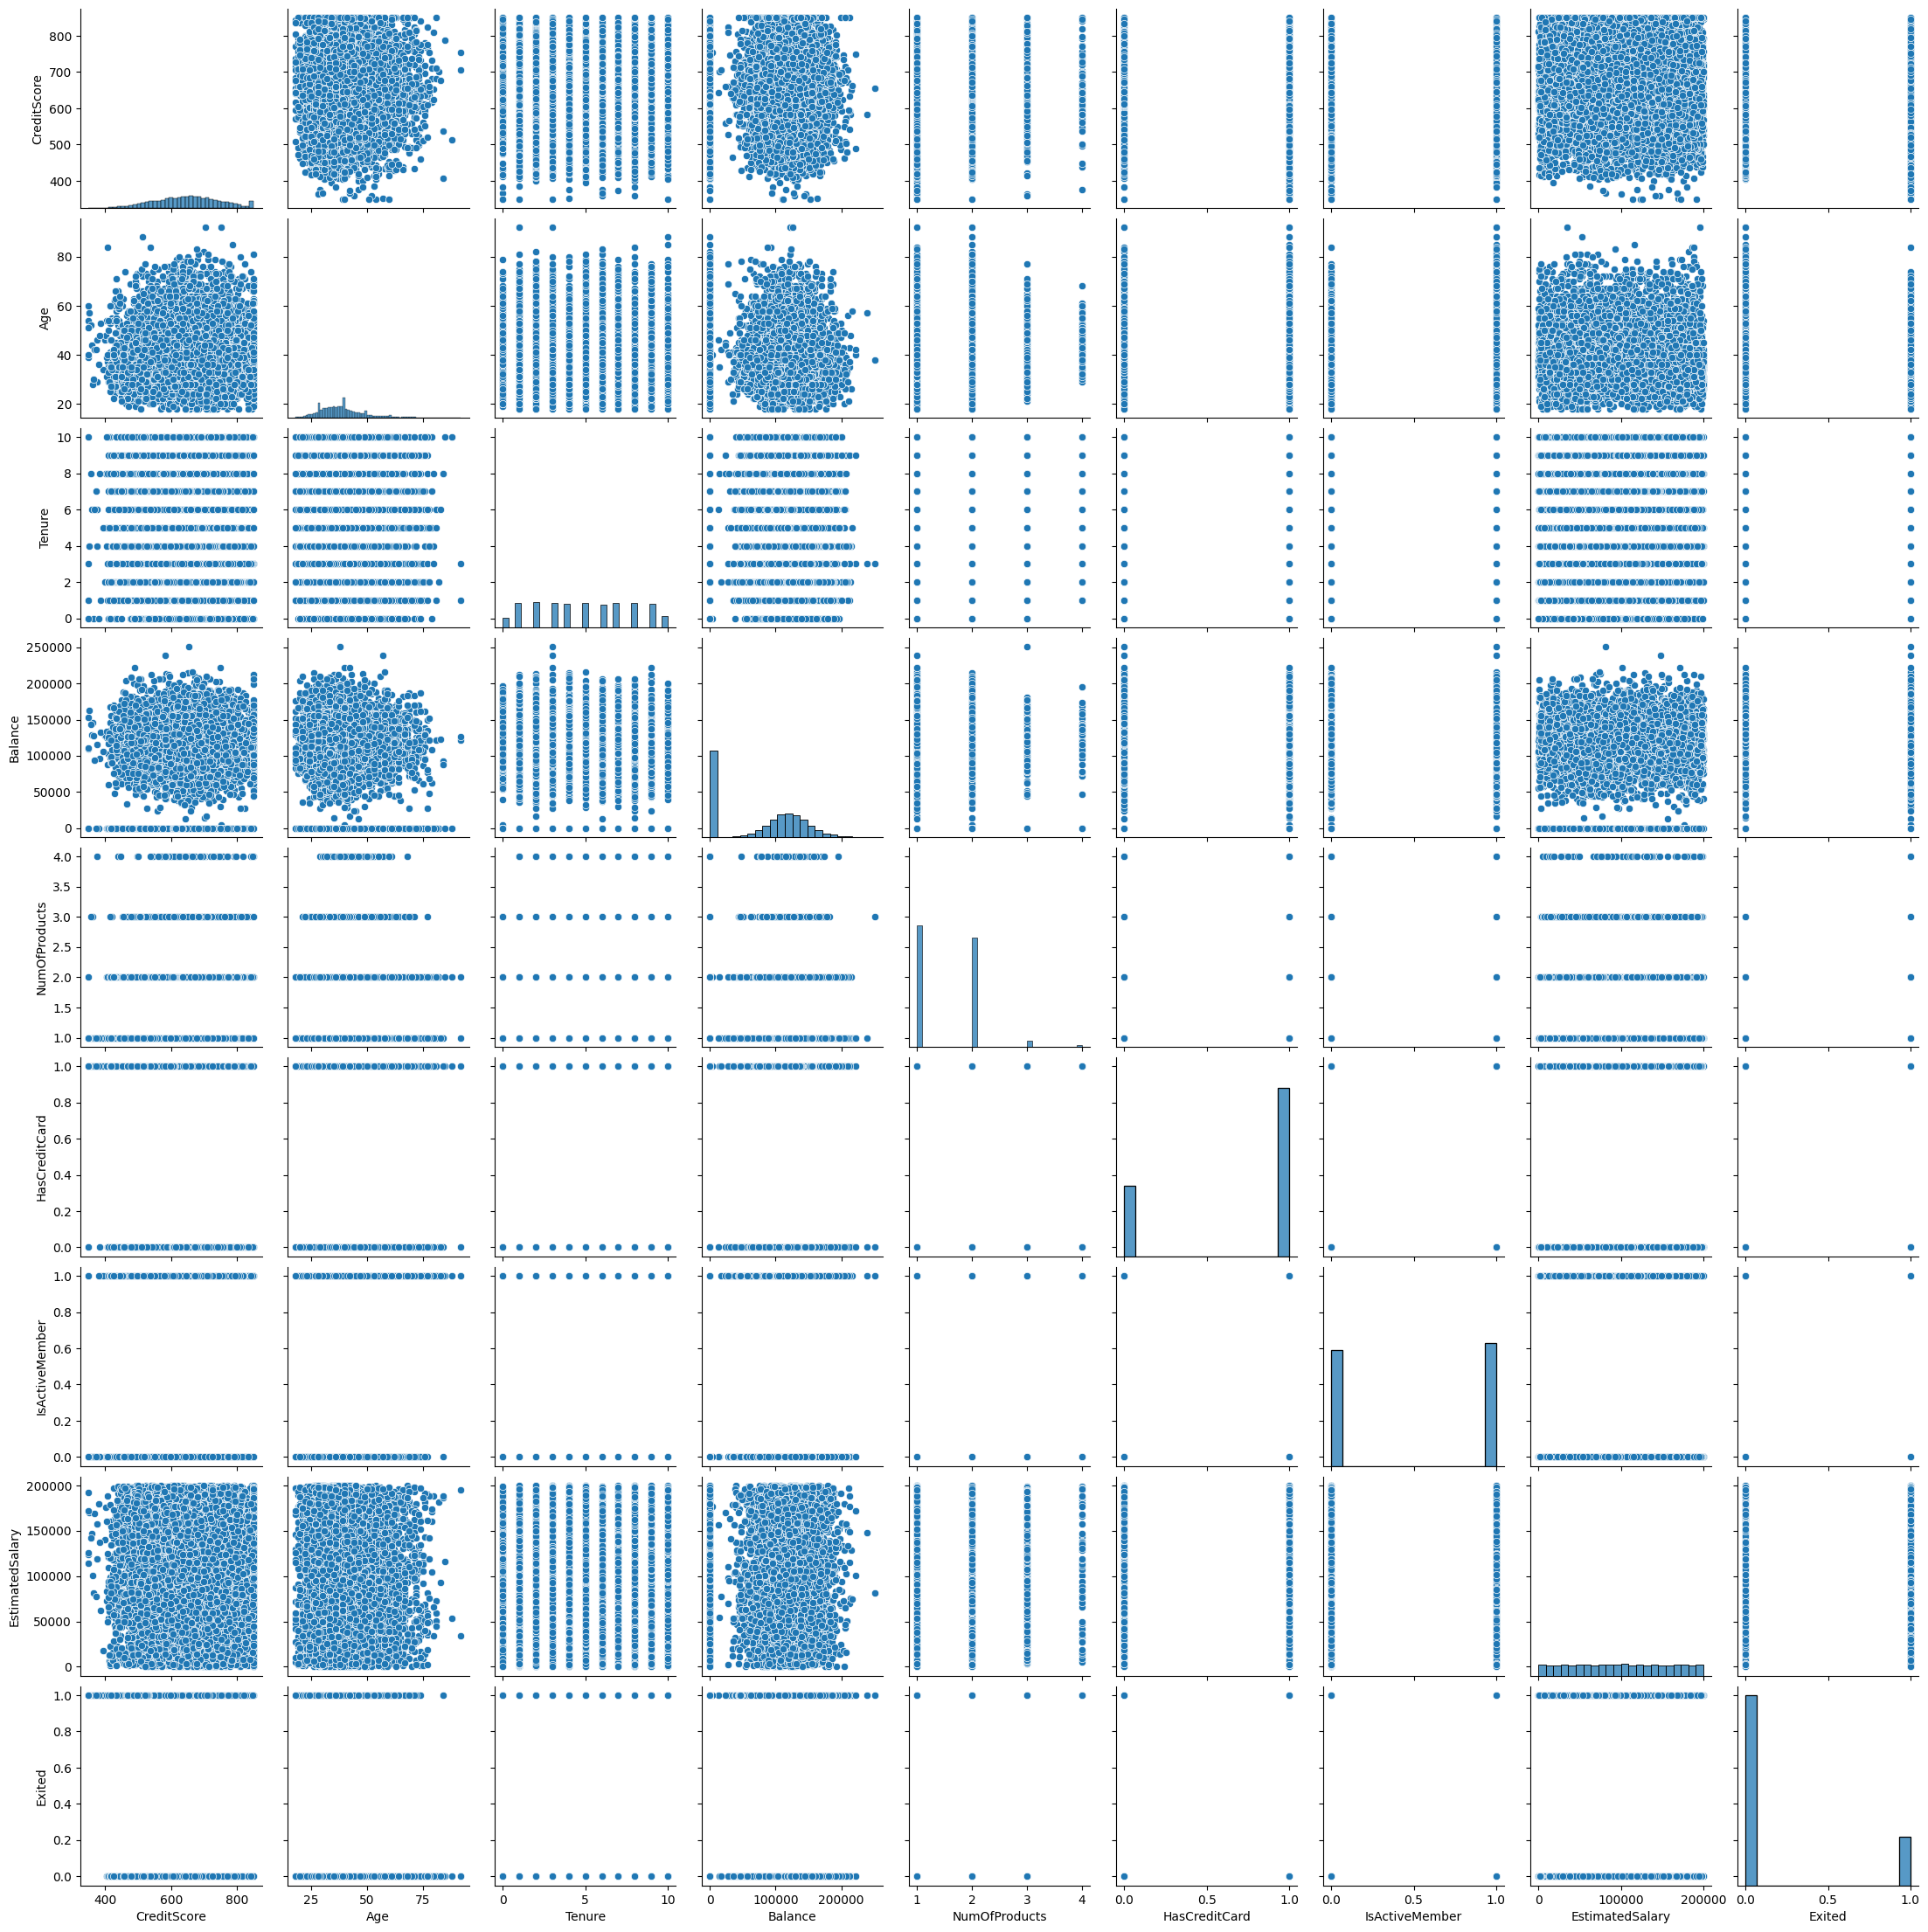

In [11]:
sns.pairplot(df)

There is much of correlation between any of the variables. The highest correlation is 0.29, which is between Age and Exited, which suggests a small positive relationship between Age and Customer Churn. A further analyis of the scatter plots show that there could be a relationship between Credit Score, Age, Balance, Number of Products with Exited respectively.

In [12]:
X = df.iloc[:, :-1]
X = pd.get_dummies(X)
X.head()
y = df.Exited

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Branch_Makati City,Branch_Manila,Branch_Quezon City,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,1,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,1,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,1,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,1,0,0,1,0


# Applying a Decision Tree Model

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

accuracy_score(y_test,y_pred_dt)

DecisionTreeClassifier()

0.8006666666666666

### Confusion Matrix

array([[2096,  320],
       [ 278,  306]])

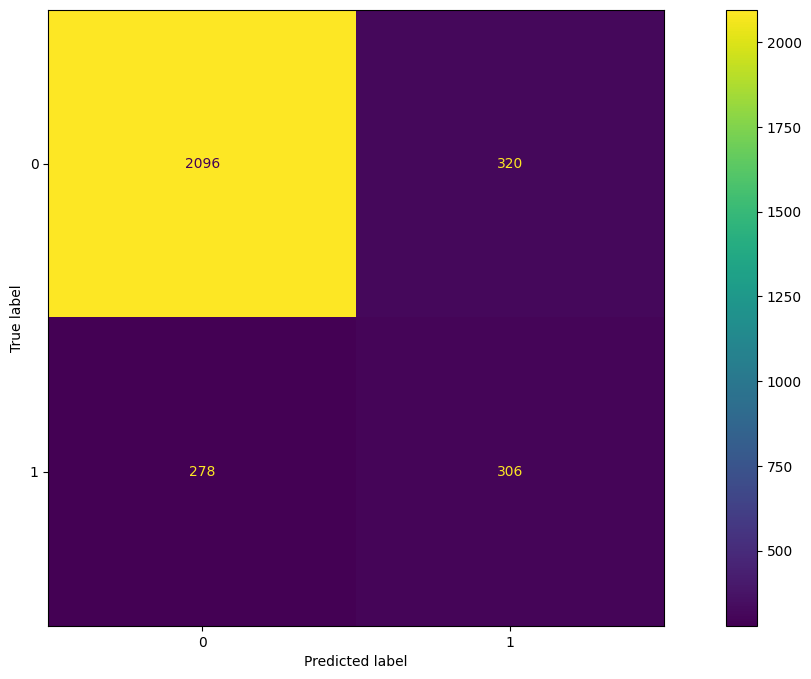

In [14]:
dt_CM = confusion_matrix(y_test, y_pred_dt)
dt_CM
dt_display = ConfusionMatrixDisplay(dt_CM, display_labels = dt.classes_).plot()

### Classification Report

In [15]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      2416
           1       0.49      0.52      0.51       584

    accuracy                           0.80      3000
   macro avg       0.69      0.70      0.69      3000
weighted avg       0.81      0.80      0.80      3000



### Tuning the Decision Tree Model

In [16]:
clf_dt = DecisionTreeClassifier(random_state=42)

# Create the parameters list we wish to tune.

parameters = {
              'max_depth':[1, 2, 3, 4, 5, 6],
              'min_samples_leaf':[2, 3, 4], 
              'min_samples_split':[10, 20, 30]
             }

# Make a accuracy scoring object.
scorer = make_scorer(accuracy_score)

# Perform grid search on the classifier using 'scorer' as the scoring method.
# Create the object.
grid_obj = GridSearchCV(clf_dt, parameters, scoring=scorer, cv=5,n_jobs=-1)

# Fit the grid search object to the training data and find the optimal parameters.
# Fit the data
grid_fit_dt = grid_obj.fit(X_train, y_train)

# View results of GridSearchCV in DataFrame
pd.concat([pd.DataFrame(grid_fit_dt.cv_results_["params"]),pd.DataFrame(grid_fit_dt.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

# Get the estimator using the best classifier
best_clf_dt = grid_fit_dt.best_estimator_

# Fit the new model.
best_clf_dt.fit(X_train, y_train)

# Make predictions using the new model on test data
best_test_predictions_dt = best_clf_dt.predict(X_test)

# Get the accuracy score
accuracy_score(y_test,best_test_predictions_dt)

# Getting the best parameters we want
best_params_dt = grid_obj.best_params_
best_params_dt


,max_depth,min_samples_leaf,min_samples_split,Accuracy
0,1,2,10,0.792429
1,1,2,20,0.792429
2,1,2,30,0.792429
3,1,3,10,0.792429
4,1,3,20,0.792429
5,1,3,30,0.792429
6,1,4,10,0.792429
7,1,4,20,0.792429
8,1,4,30,0.792429
9,2,2,10,0.826000


DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

0.8643333333333333

{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 10}

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=20)

array([[2327,   89],
       [ 318,  266]])

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.75      0.46      0.57       584

    accuracy                           0.86      3000
   macro avg       0.81      0.71      0.74      3000
weighted avg       0.85      0.86      0.85      3000



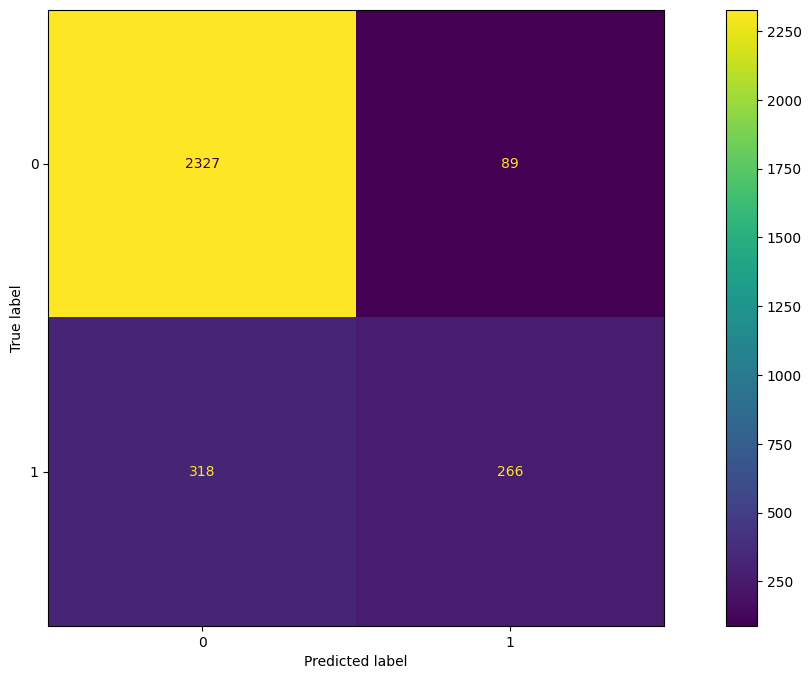

In [17]:
dt_new = DecisionTreeClassifier(max_depth = 6, min_samples_leaf=4, min_samples_split=20)
dt_new.fit(X_train, y_train)

y_pred_dt_new = dt_new.predict(X_test)


dt_new_CM = confusion_matrix(y_test, y_pred_dt_new)
dt_new_CM
dt_new_display = ConfusionMatrixDisplay(dt_new_CM, display_labels = dt_new.classes_).plot()

print(classification_report(y_test, y_pred_dt_new))

The initial decision tree had an accuracy score of 0.81.

GridSearch searches for better parameters with max_depth = 6, min_samples_leaf = 4, min_samples_split = 20 and improved the accuracy score to 0.86

# Applying K-Nearest Neighbor Model

In [18]:
knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_score(y_test,y_pred_knn)

0.7706666666666667

array([[2258,  158],
       [ 530,   54]])

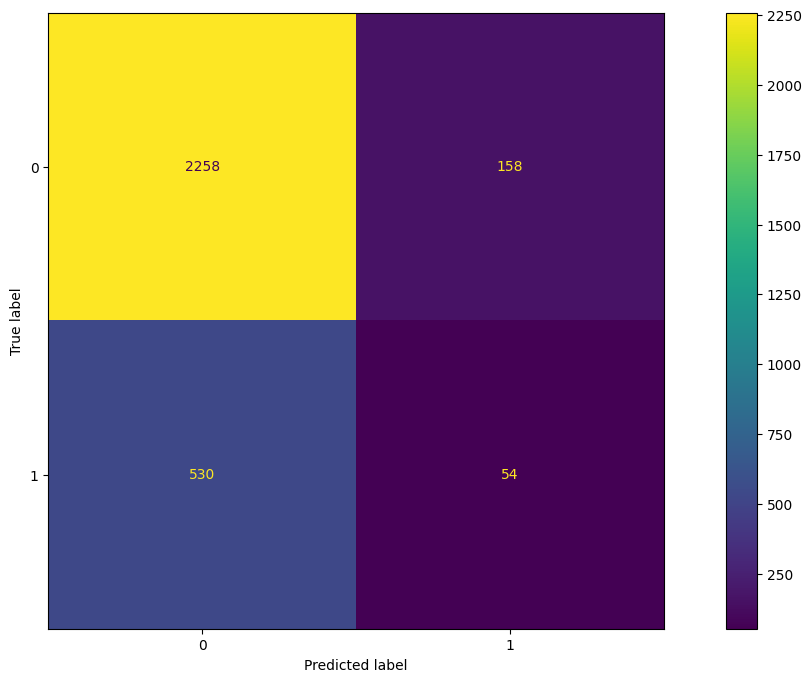

In [19]:
knn_CM = confusion_matrix(y_test, y_pred_knn)
knn_CM
knn_display = ConfusionMatrixDisplay(knn_CM, display_labels = knn.classes_).plot()

### Classification Report

In [20]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2416
           1       0.25      0.09      0.14       584

    accuracy                           0.77      3000
   macro avg       0.53      0.51      0.50      3000
weighted avg       0.70      0.77      0.73      3000



### Tuning the K-Nearest Neighbour Model

In [21]:
# Setup our GridSearch Parmaters
search_parameters = {
    'n_neighbors':  [3,50], 
    'weights':      ("uniform", "distance"),
    'algorithm':    ("ball_tree", "kd_tree", "brute", "auto"),
    'p':            [1,2] #type of distance, manhattan vs euclidean
}

# Intialize GridSearchCV
clf_knn = GridSearchCV(knn, search_parameters,cv = 5, verbose=1) # knn was already initialised earlier

# Fit our training data
clf_knn.fit(X,y)



Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('ball_tree', 'kd_tree', 'brute', 'auto'),
                         'n_neighbors': [3, 50], 'p': [1, 2],
                         'weights': ('uniform', 'distance')},
             verbose=1)

In [22]:
# Fit the grid search object to the training data and find the optimal parameters.
# Fit the data
grid_fit_knn = clf_knn.fit(X_train, y_train)

# View results of GridSearchCV in DataFrame
pd.concat([pd.DataFrame(grid_fit_knn.cv_results_["params"]),pd.DataFrame(grid_fit_knn.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

# Get the estimator using the best classifier
best_clf_knn = grid_fit_knn.best_estimator_

# Fit the new model.
best_clf_knn.fit(X_train, y_train)

# Make predictions using the new model on test data
best_test_predictions = best_clf_knn.predict(X_test)

# Get the accuracy score
accuracy_score(y_test,best_test_predictions)

# Getting the best parameters we want
best_params_dt = clf_knn.best_params_
best_params_dt

Fitting 5 folds for each of 32 candidates, totalling 160 fits


,algorithm,n_neighbors,p,weights,Accuracy
0,ball_tree,3,1,uniform,0.736429
1,ball_tree,3,1,distance,0.723429
2,ball_tree,3,2,uniform,0.736286
3,ball_tree,3,2,distance,0.717571
4,ball_tree,50,1,uniform,0.792429
5,ball_tree,50,1,distance,0.790429
6,ball_tree,50,2,uniform,0.792429
7,ball_tree,50,2,distance,0.790143
8,kd_tree,3,1,uniform,0.736429
9,kd_tree,3,1,distance,0.723429


KNeighborsClassifier(algorithm='ball_tree', n_neighbors=50, p=1)

0.8053333333333333

{'algorithm': 'ball_tree', 'n_neighbors': 50, 'p': 1, 'weights': 'uniform'}

In [23]:
ss = StandardScaler()
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(ss.fit_transform(X_test), columns = X_test.columns)
X_train_scaled.head()
X_train_scaled.head()

knn_new = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=50, p=1, weights='uniform')
knn_new = knn_new.fit(X_train_scaled, y_train)

y_pred_knn_new = knn_new.predict(X_test_scaled)
accuracy_score(y_test, y_pred_knn_new)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Branch_Makati City,Branch_Manila,Branch_Quezon City,Gender_Female,Gender_Male
0,-0.344595,-0.656750,-0.342170,1.583725,0.819663,0.645981,0.970714,1.248214,1.730732,-1.001716,-0.575591,1.098232,-1.098232
1,-0.095181,-0.466380,0.698162,1.344106,-0.903352,-1.548034,0.970714,1.521225,-0.577790,-1.001716,1.737346,1.098232,-1.098232
2,-0.947345,-0.561565,0.351385,-1.222055,0.819663,-1.548034,-1.030169,1.263615,-0.577790,0.998287,-0.575591,-0.910554,0.910554
3,-0.354987,0.199916,1.044940,-0.618965,-0.903352,0.645981,0.970714,1.646839,-0.577790,-1.001716,1.737346,-0.910554,0.910554
4,0.642668,-0.180824,1.391718,1.152808,0.819663,-1.548034,0.970714,0.875112,-0.577790,0.998287,-0.575591,-0.910554,0.910554


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Branch_Makati City,Branch_Manila,Branch_Quezon City,Gender_Female,Gender_Male
0,-0.344595,-0.656750,-0.342170,1.583725,0.819663,0.645981,0.970714,1.248214,1.730732,-1.001716,-0.575591,1.098232,-1.098232
1,-0.095181,-0.466380,0.698162,1.344106,-0.903352,-1.548034,0.970714,1.521225,-0.577790,-1.001716,1.737346,1.098232,-1.098232
2,-0.947345,-0.561565,0.351385,-1.222055,0.819663,-1.548034,-1.030169,1.263615,-0.577790,0.998287,-0.575591,-0.910554,0.910554
3,-0.354987,0.199916,1.044940,-0.618965,-0.903352,0.645981,0.970714,1.646839,-0.577790,-1.001716,1.737346,-0.910554,0.910554
4,0.642668,-0.180824,1.391718,1.152808,0.819663,-1.548034,0.970714,0.875112,-0.577790,0.998287,-0.575591,-0.910554,0.910554


0.8296666666666667

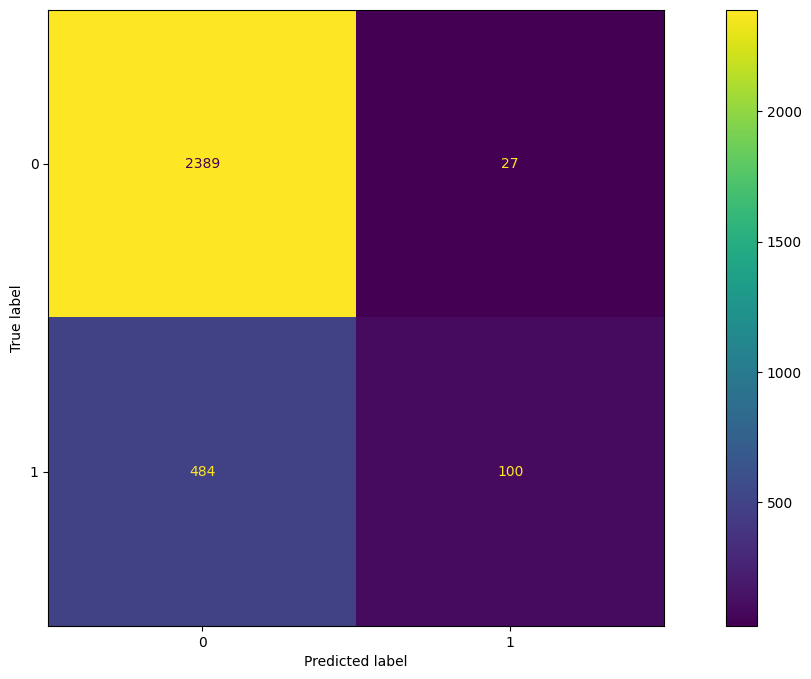

In [24]:
knn_new_CM = confusion_matrix(y_test, y_pred_knn_new)
knn_display_new = ConfusionMatrixDisplay(knn_new_CM, display_labels = knn_new.classes_).plot()

In [25]:
print(classification_report(y_test, y_pred_knn_new))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2416
           1       0.79      0.17      0.28       584

    accuracy                           0.83      3000
   macro avg       0.81      0.58      0.59      3000
weighted avg       0.82      0.83      0.78      3000



The initial K-Nearest Neighbour model had an accuracy score of 0.77.

GridSearch searches for better parameters with algorithm = 'ball_tree', n_neighbors = 50, p = 1, weights = 'uniform' and improved the accuracy score to 0.80, and scaling the X variables further increased the accuracy score to 0.83.

# Summary
- Utilized Decision Tree and KNN to predict customer churn
- Both models have good accuracies score, with the Decision Tree model performing slightly better than the KNN model (86% versus 83%)
- In this case study, recall is more important as the cost of False Negatives are higher i.e we do not want to wrongly predict the customers who churned as did not churn. The recall scores are not very ideal for both the models. The highest recall score is 0.53 from the Decision Tree model before tuning
- For further model improvement, we can tweak our variables used; to only use variables that have some relationship with customer churn. We could also use Random Forest and Logistic Regression to see if they yield better results
